In [135]:
import numpy as np
import matplotlib.pyplot as plt

In [165]:
class opticalSystem:
    def __init__(self, lens1Focal, lens1to2Gap, lens2Focal, lens2to3Gap, lens3Focal):
        #floats, are what they say, in mms
        #below we set up the above as lists
        self.focal = [lens1Focal,lens2Focal,lens3Focal]
        self.delX = [100, lens1to2Gap, lens2to3Gap, 100]
        self.x = [-self.delX[0],0,self.delX[1],self.delX[2]+self.delX[1], self.delX[3]+self.delX[2]+self.delX[1]]
        #then make a list of the Rates of Convergance of our lenses
        self.c = [0,1/self.focal[0],1/self.focal[1],1/self.focal[2]]
    
    def simRay(self,rayC, y1):
        
        y0 = y1 + (rayC*self.delX[0])
        y1 = y1
        y2 = y1 - (rayC + self.c[1]*y1)*(self.delX[1])
        y3 = y2 - (rayC + self.c[1]*y1 + self.c[2]*y2)*self.delX[2]
        y4 = y2 - (rayC + self.c[1]*y1 + self.c[2]*y2 + self.c[3]*y3)*self.delX[3]
        
        y = np.array([y0,y1,y2,y3,y4])
        
        dy0 = (y1-y0)/self.delX[0]
        dy1 = (y2-y1)/self.delX[1]
        dy2 = (y3-y2)/self.delX[2]
        dy3 = (y4-y3)/self.delX[3]
        
        dy = [dy0,dy1,dy2,dy3]
        
        start = 0
        x = np.array(self.x)
        
        return np.array([x,y])

In [166]:
def intersection(x1,y1,x2,y2):
    #this takes the ray data I'm building up and returns any intersections between the two rays.
    #all inputs are lists of points that are connected by lines
    #IT IS ASSUMED ALL INPUT LISTS ARE OF SAME LENGTH, x1 = x2
    
    intersects = []
    #find intersections in the between lens regime
    for i in range(1,len(x1),1):
        denom = y1[i-1]-y1[i]-y2[i-1]+y2[i]
        
        if denom != 0:
            intX = (y1[i-1]-y2[i-1]) * (x1[i]-x1[i-1]) / denom
            intX += x1[i-1]
            intY = y2[i-1] + (intX-x2[i-1]) * (y2[i]-y2[i-1])/(x2[i]-x2[i-1])
            if intX <= x1[i] and intX >= x1[i-1]:
                intersects.append([intX, intY])
                
    
    #find any after lens intersections
    
    
    return np.array(intersects)

In [193]:
def imageRays(distance,yIn,lensRadius,numRays):
    #This function generates a list of indident rays defined by an objects location.
    #all in are floats except numRays, which is an int
    #outputs a numpy array of the rays slopes and x hit on a lens
    rays = []
    
    for i in np.linspace(-lensRadius,lensRadius,num=numRays):
        c = (yIn-i)/distance
        y = i
        rays.append(np.array([c,y]))
    
    
    return np.array(rays)

INTERSECTIONS OF FIRST AND LAST RAY
[[ 74.1124326   -5.94463632]
 [283.24912223  -1.3970939 ]]
film imgae from last lens (must be >=43mm)
38.24912222937115


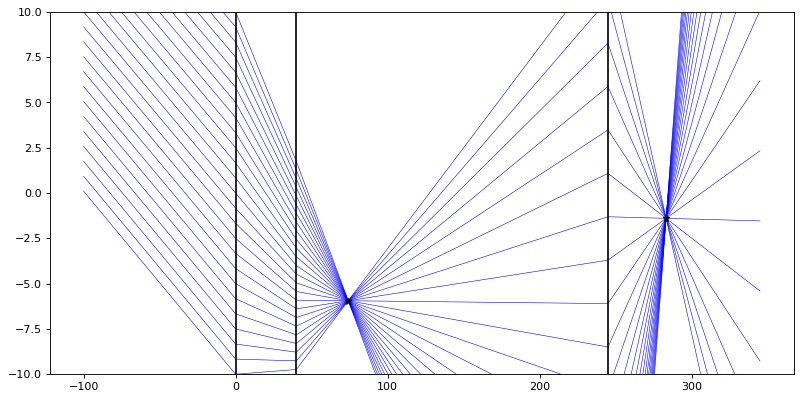

In [230]:
#EXAMPLE:intersection of two rays put through an optical system, as well as graphic output of said rays
lens1Focal = 93
lens2Focal = 93
lens3Focal = 50
gap1 = 40
gap2 = 205
lens1 = opticalSystem(lens1Focal, gap1, lens2Focal, gap2, lens3Focal)
rays = imageRays(9999,1000,10,25)

x = []
y = []

for i in range(0,len(rays[:,0]),1):
    tracedRay = lens1.simRay(rays[i,0],rays[i,1])
    x.append(tracedRay[0])
    y.append(tracedRay[1])

plt.figure(figsize=(12, 6), dpi=80)
plt.ylim((-10, 10))
for i in range(0,len(rays[:,0]),1):
    plt.plot(x[i],y[i],'b',linewidth=0.5)


plt.axvline(x = 0, color = 'k', label = 'axvline - full height')
plt.axvline(x = gap1, color = 'k', label = 'axvline - full height')
plt.axvline(x = gap2+gap1, color = 'k', label = 'axvline - full height')


images = intersection(x[0],y[0],x[9],y[9])
plt.plot(images[:,0],images[:,1],'k*')
print("INTERSECTIONS OF FIRST AND LAST RAY")
print(images)
print('film imgae from last lens (must be >=43mm)')
print(images[1,0]-gap1-gap2)

In [ ]:
#Now we start exploring some rapid simulating, to see if I can't find a perfect solution. NBD

Focals = [20,30,40,50,60,70,]